# Train Classifier and get layer activations for training and test data

In [1]:
import os, pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent.parent.parent
os.chdir(home_dir)
os.getcwd()

'/home/tom/Uni_Dev/cladec-mnist'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

from src.common import save_layer_activations
from src.mnist.data import get_mnist_train_test, get_mnist_labels_categorical
from src.mnist.perfectAE.file_names import SAVED_CLASSIFIER_PATH
from src.models import get_classifier_model_compiled

tf.random.set_seed(1234)
print(tf.__version__)
print(np.__version__)
print(keras)

train_images, test_images = get_mnist_train_test()
train_labels_c, test_labels_c = get_mnist_labels_categorical()

2.9.1
1.22.4
<module 'keras.api._v2.keras' from '/home/tom/.local/share/virtualenvs/cladec-mnist-KzwMDeQR/lib/python3.10/site-packages/keras/api/_v2/keras/__init__.py'>


# Train a classifier on MNIST and save the model

In [3]:
model = get_classifier_model_compiled()
model.summary()

2022-06-01 11:16:13.370718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 11:16:13.472371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 11:16:13.472690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 11:16:13.474710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [4]:
history = model.fit(train_images, train_labels_c, epochs=10)

2022-06-01 11:16:15.087507: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-06-01 11:16:15.379606: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2022-06-01 11:16:18.334542: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8303


1875/1875 [==============================] - 18s 6ms/step - loss: 0.1628 - categorical_accuracy: 0.9513
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0671 - categorical_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0554 - categorical_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0451 - categorical_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0383 - categorical_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0338 - categorical_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0304 - categorical_accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0294 - categorical_accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0242 - categ

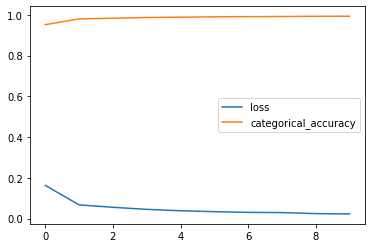

In [5]:
for k, vs in history.history.items():
    plt.plot(vs, label=k)
plt.legend()
plt.show()

In [6]:
model.evaluate(test_images, test_labels_c)

2022-06-01 11:18:21.454273: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2022-06-01 11:18:21.525375: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0316 - categorical_accuracy: 0.9917


[0.03159821778535843, 0.9916999936103821]

## without BatchNorm and Dropout layer:

Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0061 - categorical_accuracy: 0.9980
[0.03889504075050354, 0.9901999831199646]

## with BatchNorm (axis=-1) and Dropout (0.5)

Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0223 - categorical_accuracy: 0.9929
[0.030388642102479935, 0.991599977016449]


In [7]:
model.save(SAVED_CLASSIFIER_PATH)

INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/perfectAE/classifier/assets


INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/perfectAE/classifier/assets


# Get Activations for train and test images

https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction

## 128 Neuron Dense Layer

In [8]:
layer_name = 'dense'
dense_path = SAVED_CLASSIFIER_PATH.joinpath('dense')
save_layer_activations(dense_path, model, layer_name, test_images, train_images)

2022-06-01 11:18:23.861864: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2022-06-01 11:18:24.005572: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 285.17MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-01 11:18:24.005729: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.61GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-01 11:18:24.005765: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean 

# Last Convolutional Layer

In [9]:
conv_path = SAVED_CLASSIFIER_PATH.joinpath('conv')
layer_name = 'max_pooling2d_1'
save_layer_activations(conv_path, model, layer_name, test_images, train_images)